# Proyecto 1

### Definición del Problema

Este proyecto tiene como propósito ser una herramienta para desarrollar un modelo predictivo que apoye a la toma de decisiones que ayuden a mejorar la detección temprana y el manejo de enfermedades cardíacas basandonos en varios pacientes de distintas edades, esto potencialmente puede salvar vidas y mejorar la calidad de vida de los pacientes para futuros pacientes.

Al predecir la presencia de enfermedades cardíacas y comprender los factores de riesgo de casos pasados, los profesionales de la salud pueden intervenir de manera más efectiva para prevenir, detectar y tratar enfermedades, lo que potencialmente puede salvar vidas y mejorar la calidad de vida de las personas afectadas.

### Recolección y Preparación de Datos

La base de datos viene de Kaggle

In [136]:
!pip install matplotlib
import pandas as pd
import matplotlib as plt

In [137]:
data = "../data/raw/heart 2.csv"
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Los datos vienen de cuatro datasets de países distintos los cuales son Cleveland, Hungría, Suiza y Long Beach V, a esta base de datos se accede mediante la función "read csv" para crear un DataFrame de dichos datos, donde cada columna representa:

- Edad
- Sexo
- Tipo de dolor en el pecho (4 valores)
- Presión arterial en reposo
- Colesterol sérico en mg/dl
- Azúcar en sangre en ayunas > 120 mg/dl
- Resultados electrocardiográficos en reposo (valores 0, 1, 2)
- Frecuencia cardíaca máxima alcanzada
- Angina inducida por ejercicio
- Depresión del segmento ST inducida por ejercicio en relación al reposo
- La pendiente del segmento ST del ejercicio máximo
- Número de vasos principales (0-3) coloreados por fluoroscopia
- Thal: 0 = normal; 1 = defecto fijo; 2 = defecto reversible

In [138]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Como podemos observar, en el DataFrame no existen datos faltantes, sin embargo existe una columna inservible

In [139]:
df = df.drop('target', axis=1)


### Análisis Exploratorio de Datos (EDA)

**Edad**

In [140]:
print('Su mediana es', df['age'].median())
print('Su moda es', df['age'].mode())
print('Su curtosis es de', df['age'].kurt())
print('Su sesgo es de', df['age'].skew())
print(df['age'].describe())

Su mediana es 56.0
Su moda es 0    58
Name: age, dtype: int64
Su curtosis es de -0.5256178128684339
Su sesgo es de -0.24886590174584555
count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64


<Axes: ylabel='Frequency'>

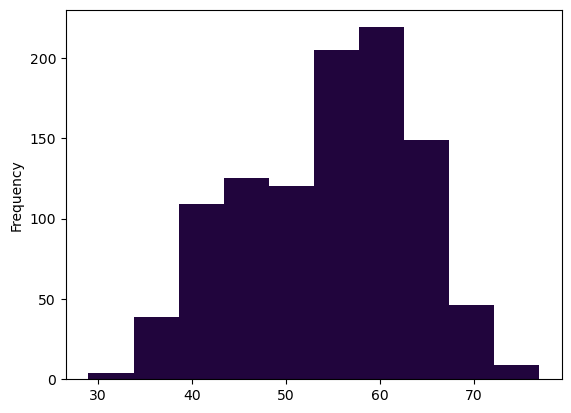

In [141]:
df["age"].plot(kind = "hist", color = (.13, .02, .24) )

**Cantidad de arterias principales**

In [142]:
print('Su mediana es', df['ca'].median())
print('Su moda es', df['ca'].mode())
print('Su curtosis es de', df['ca'].kurt())
print('Su sesgo es de', df['ca'].skew())
print(df['ca'].describe())

Su mediana es 0.0
Su moda es 0    0
Name: ca, dtype: int64
Su curtosis es de 0.7011228657727422
Su sesgo es de 1.2611886429097716
count    1025.000000
mean        0.754146
std         1.030798
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: ca, dtype: float64


<Axes: ylabel='Frequency'>

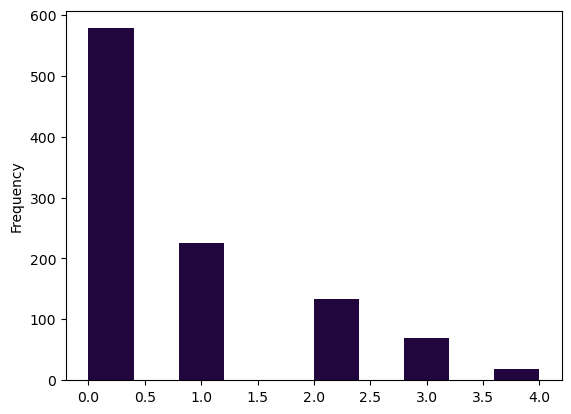

In [143]:
df["ca"].plot(kind = "hist", color = (.13, .02, .24) )

**Colesterol sérico**

In [144]:
print('Su mediana es', df['chol'].median())
print('Su moda es', df['chol'].mode())
print('Su curtosis es de', df['chol'].kurt())
print('Su sesgo es de', df['chol'].skew())
print(df['chol'].describe())

Su mediana es 240.0
Su moda es 0    204
1    234
Name: chol, dtype: int64
Su curtosis es de 3.9968030492724647
Su sesgo es de 1.0740727783354815
count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64


<Axes: ylabel='Frequency'>

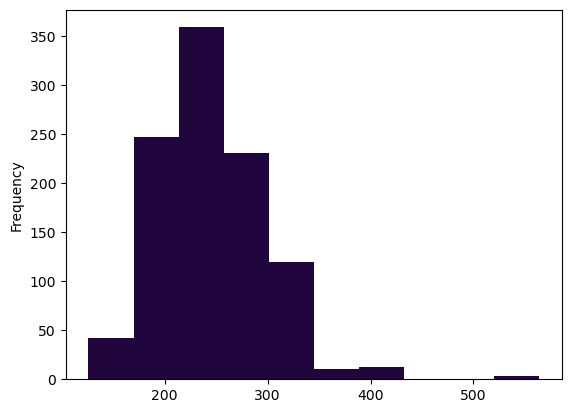

In [145]:
df["chol"].plot(kind = "hist", color = (.13, .02, .24) )

**Dolor de pecho (0-3)**

In [146]:
print('Su mediana es', df['cp'].median())
print('Su moda es', df['cp'].mode())
print('Su curtosis es de', df['cp'].kurt())
print('Su sesgo es de', df['cp'].skew())
print(df['cp'].describe())

Su mediana es 1.0
Su moda es 0    0
Name: cp, dtype: int64
Su curtosis es de -1.1494995222913056
Su sesgo es de 0.5294552058584099
count    1025.000000
mean        0.942439
std         1.029641
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: cp, dtype: float64


<Axes: ylabel='Frequency'>

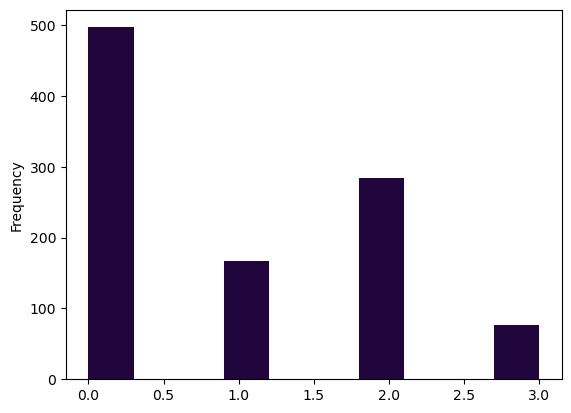

In [147]:
df["cp"].plot(kind = "hist", color = (.13, .02, .24) )

**Frecuencia cardíaca máxima alcanzada**

In [148]:
print('Su mediana es', df['exang'].median())
print('Su moda es', df['exang'].mode())
print('Su curtosis es de', df['exang'].kurt())
print('Su sesgo es de', df['exang'].skew())
print(df['exang'].describe())

Su mediana es 0.0
Su moda es 0    0
Name: exang, dtype: int64
Su curtosis es de -1.5232047382747014
Su sesgo es de 0.692655170469321
count    1025.000000
mean        0.336585
std         0.472772
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: exang, dtype: float64


<Axes: ylabel='Frequency'>

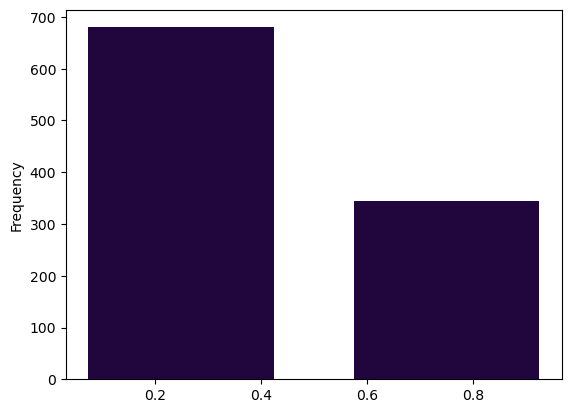

In [157]:
df["exang"].plot(kind = "hist", bins = 2, rwidth = 0.7, color = (.13, .02, .24) )


**Azúcar en sangre en ayunas > 120 mg/dl**

In [150]:
print('Su mediana es', df['fbs'].median())
print('Su moda es', df['fbs'].mode())
print('Su curtosis es de', df['fbs'].kurt())
print('Su sesgo es de', df['fbs'].skew())
print(df['fbs'].describe())

Su mediana es 0.0
Su moda es 0    0
Name: fbs, dtype: int64
Su curtosis es de 1.8898593171743996
Su sesgo es de 1.9713385276901942
count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64


**Depresión del ST inducida por el ejercicio en relación con el reposo**

In [151]:
print('Su mediana es', df['oldpeak'].median())
print('Su moda es', df['oldpeak'].mode())
print('Su curtosis es de', df['oldpeak'].kurt())
print('Su sesgo es de', df['oldpeak'].skew())
print(df['oldpeak'].describe())

Su mediana es 0.8
Su moda es 0    0.0
Name: oldpeak, dtype: float64
Su curtosis es de 1.3144708893202801
Su sesgo es de 1.2108993882065326
count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
25%         0.000000
50%         0.800000
75%         1.800000
max         6.200000
Name: oldpeak, dtype: float64


**resultados electrocardiográficos en reposo (valores 0,1,2)**

In [152]:
print('Su mediana es', df['restecg'].median())
print('Su moda es', df['restecg'].mode())
print('Su curtosis es de', df['restecg'].kurt())
print('Su sesgo es de', df['restecg'].skew())
print(df['restecg'].describe())

Su mediana es 1.0
Su moda es 0    1
Name: restecg, dtype: int64
Su curtosis es de -1.3096135146492
Su sesgo es de 0.18044041112923528
count    1025.000000
mean        0.529756
std         0.527878
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: restecg, dtype: float64


**Angina inducida por el ejercicio**

In [153]:
print('Su mediana es', df['exang'].median())
print('Su moda es', df['exang'].mode())
print('Su curtosis es de', df['exang'].kurt())
print('Su sesgo es de', df['exang'].skew())
print(df['exang'].describe())

Su mediana es 0.0
Su moda es 0    0
Name: exang, dtype: int64
Su curtosis es de -1.5232047382747014
Su sesgo es de 0.692655170469321
count    1025.000000
mean        0.336585
std         0.472772
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: exang, dtype: float64


**Sexo**

In [154]:
print("0 equivale a mujer y 1 a hombre")
print('Su mediana es', df['sex'].median())
print('Su moda es', df['sex'].mode())
print('Su curtosis es de', df['sex'].kurt())
print('Su sesgo es de', df['sex'].skew())
print(df['sex'].describe())

0 equivale a mujer y 1 a hombre
Su mediana es 1.0
Su moda es 0    1
Name: sex, dtype: int64
Su curtosis es de -1.2775313330187505
Su sesgo es de -0.8514488985126767
count    1025.000000
mean        0.695610
std         0.460373
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64


**Pendiente del segmento ST del ejercicio máximo**

In [155]:
print('Su mediana es', df['slope'].median())
print('Su moda es', df['slope'].mode())
print('Su curtosis es de', df['slope'].kurt())
print('Su sesgo es de', df['slope'].skew())
print(df['slope'].describe())

Su mediana es 1.0
Su moda es 0    1
Name: slope, dtype: int64
Su curtosis es de -0.6471291959211065
Su sesgo es de -0.4791344197425813
count    1025.000000
mean        1.385366
std         0.617755
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: slope, dtype: float64


**Thal: 0 = normal; 1 = defecto fijo; 2 = defecto reversible**

In [156]:
print('Su mediana es', df['thal'].median())
print('Su moda es', df['thal'].mode())
print('Su curtosis es de', df['thal'].kurt())
print('Su sesgo es de', df['thal'].skew())
print(df['thal'].describe())

Su mediana es 2.0
Su moda es 0    2
Name: thal, dtype: int64
Su curtosis es de 0.25082653446427816
Su sesgo es de -0.5243897710407986
count    1025.000000
mean        2.323902
std         0.620660
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: thal, dtype: float64
